In [2]:
import numpy as np, pandas as pd , matplotlib.pyplot as plt
from glob import glob
from fetch_data import fetch_data

In [3]:
data_home_team = fetch_data(20240201,20240331,'home_team')


data_away_team = fetch_data(20240201,20240331,'away_team')

/home/nima/data_science/tennis_project/SofaScore-Tennis-Analysis/notebooks/fetch_data.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(dataframes,ignore_index=True)
/home/nima/data_science/tennis_project/SofaScore-Tennis-Analysis/notebooks/fetch_data.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(dataframes,ignore_index=True)


In [5]:
total_data = pd.concat([data_away_team,data_home_team])

In [6]:
unique_columns = ["name","slug"]
unique_data = total_data.drop_duplicates(subset=unique_columns)

mask_columns = ["name","height"]
unique_height_data = unique_data[mask_columns]

In [7]:
mean_height = np.mean(unique_height_data["height"])
correct_unique_height_data = unique_height_data.fillna(mean_height)

In [8]:
correct_unique_height_data.to_csv("../data/external/2/players_height.csv",index=False)

correct_unique_height_data

,name,height
0,Auger-Aliassime F.,1.930000
1,Cobolli F.,1.830000
2,Martínez P.,1.850000
3,Muller A.,1.830000
4,Mayot H.,1.780000
...,...,...
25009,Davis L.,1.570000
25019,Melichar-Martinez N.,1.810000
25147,Urribarrens Ramirez I.,1.821302
25562,Gadient N.,1.821302


In [9]:
mean_height = float(mean_height)
mean_height

1.8213020439061318

<h2>IQR Method</h2>

(array([  2.,   5.,  19.,  16.,  27.,  91.,  57., 106., 116., 165., 330.,
          4., 144.,  91.,  73.,  41.,  22.,   3.,   6.,   3.]),
 array([1.57  , 1.5955, 1.621 , 1.6465, 1.672 , 1.6975, 1.723 , 1.7485,
        1.774 , 1.7995, 1.825 , 1.8505, 1.876 , 1.9015, 1.927 , 1.9525,
        1.978 , 2.0035, 2.029 , 2.0545, 2.08  ]),
 <BarContainer object of 20 artists>)

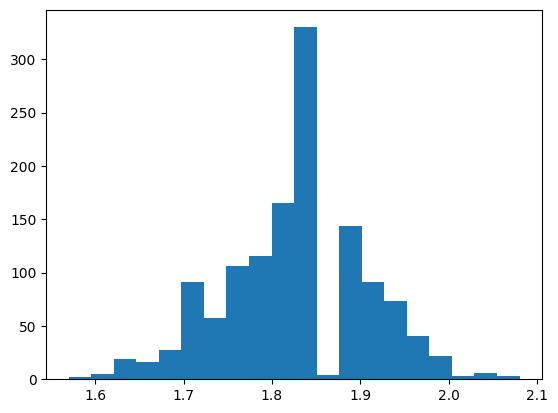

In [11]:
plt.hist(unique_height_data["height"],bins=20)

In [12]:
data = unique_height_data["height"].describe()
data

count    1321.000000
mean        1.821302
std         0.080584
min         1.570000
25%         1.780000
50%         1.830000
75%         1.880000
max         2.080000
Name: height, dtype: float64

In [13]:
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3 - q1

bottom_range = (data >= (q1 - 1.5 * iqr))
top_range = (data <=  (q3 + 1.5  * iqr))

correct_data = data[bottom_range & top_range]
correct_data

mean    1.821302
min     1.570000
25%     1.780000
50%     1.830000
75%     1.880000
max     2.080000
Name: height, dtype: float64

In [14]:
mean_height = float(np.mean(correct_data))
mean_height

1.8268836739843552